In [2]:
pip install pyannote.audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 385 kB 7.6 MB/s 
     |████████████████████████████████| 47 kB 6.3 MB/s 
     |████████████████████████████████| 111 kB 55.8 MB/s 
     |████████████████████████████████| 419 kB 52.2 MB/s 
     |████████████████████████████████| 498 kB 52.9 MB/s 
     |████████████████████████████████| 60 kB 9.9 MB/s 
     |████████████████████████████████| 51 kB 156 kB/s 
     |████████████████████████████████| 41 kB 604 kB/s 
     |████████████████████████████████| 585 kB 55.4 MB/s 
     |████████████████████████████████| 79 kB 11.6 MB/s 
     |████████████████████████████████| 101 kB 15.7 MB/s 
     |████████████████████████████████| 129 kB 75.2 MB/s 
     |████████████████████████████████| 117 kB 73.6 MB/s 
     |████████████████████████████████| 130 kB 59.1 MB/s 
     |████████████████████████████████| 348 kB 68.7 MB/s 
     |████████████████████████████████| 8

In [5]:
from pyannote.audio import Inference
inference = Inference("pyannote/embedding", window="whole")

Downloading:   0%|          | 0.00/96.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

In [39]:
### Korean Multi speaker Dataset
### https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=542

In [ ]:
from google.colab import files
files.upload()

In [28]:
import os
import numpy as np
# Get wave files
wav_files = [file for file in os.listdir('./') if file.endswith('.wav')]
# Get Embeddings
embeddings = np.stack([inference(file) for file in wav_files])
# Normalization
embeddings = embeddings / np.linalg.norm(embeddings, ord=2, axis=1, keepdims=True)
print(embeddings.shape)

(10, 512)


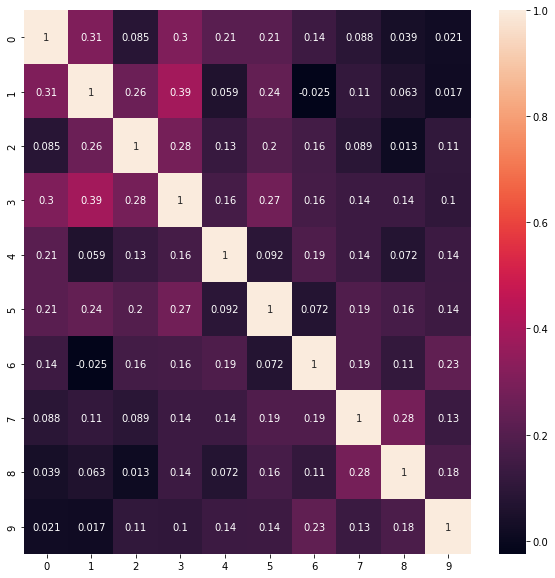

In [31]:
corr = embeddings @ embeddings.T

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
sns.heatmap(corr, annot = True)
plt.show()

In [33]:
import librosa
import IPython.display as ipd

wav, sr = librosa.load(wav_files[0])
ipd.Audio(wav, rate=sr)

In [34]:
wav, sr = librosa.load(wav_files[1])
ipd.Audio(wav, rate=sr)

In [36]:
wav, sr = librosa.load(wav_files[9])
ipd.Audio(wav, rate=sr)